In [1]:
from google.colab import files

uploaded = files.upload()



import pandas as pd

import statsmodels.formula.api as smf



file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name)

Saving Salary_Data_Tugas EDA.xlsx to Salary_Data_Tugas EDA.xlsx


In [2]:
df = df.reset_index(drop=True)
df.index = df.index + 1

display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [3]:
print("Ukuran dataset (baris, kolom):", df.shape)

print("Jumlah total elemen:", df.size)

Ukuran dataset (baris, kolom): (6707, 6)
Jumlah total elemen: 40242


In [4]:
my_variable = "Hello"
print("Tipe data my_variable:", type(my_variable))
my_number = 123
print("Tipe data my_number:", type(my_number))

print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)

Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>

Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [5]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [6]:
duplicate_rows_count = df.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_rows_count}")

if df.duplicated().any():
    print("\nBeberapa baris duplikat pertama:")
    print(df[df.duplicated()].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:
     Age  Gender Education Level                              Job Title  \
195   28    Male      Bachelor's                Junior Business Analyst   
250   30  Female      Bachelor's           Junior Marketing Coordinator   
251   38    Male        Master's                   Senior IT Consultant   
252   45  Female             PhD                Senior Product Designer   
253   28    Male      Bachelor's  Junior Business Development Associate   

     Years of Experience    Salary  
195                  2.0   40000.0  
250                  2.0   40000.0  
251                  9.0  110000.0  
252                 15.0  150000.0  
253                  2.0   40000.0  


In [7]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


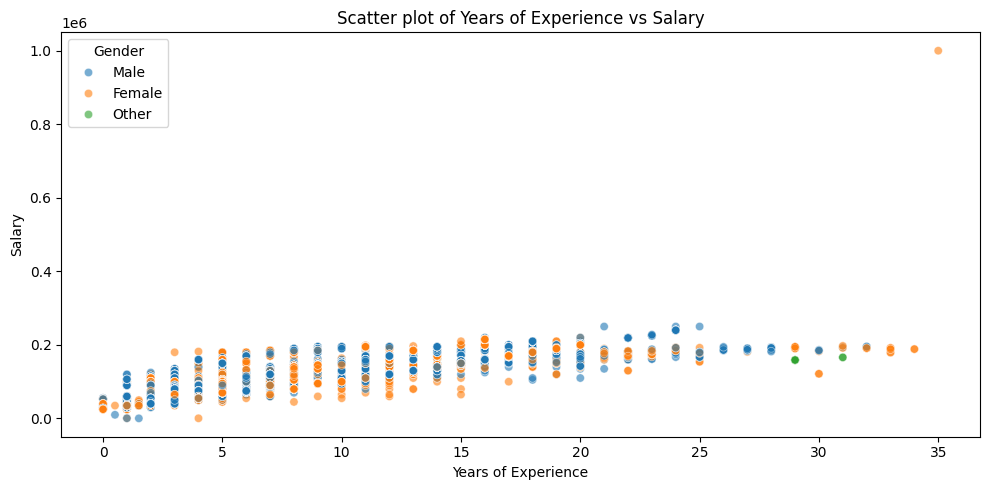

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_scatter = ['Years of Experience', 'Salary']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,
                x=numerical_cols_scatter[0],
                y=numerical_cols_scatter[1],
                hue='Gender',
                alpha=0.6)

plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

In [9]:
print("Lima baris pertama dari DataFrame:")
display(df.head())

print("\nInfromasi tentang DataFrame:")
df.info()

print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Lima baris pertama dari DataFrame:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0



Infromasi tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64



Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 20000000):


,Salary
count,6703.000000
mean,115446.119200
std,53881.790154
min,350.000000
25%,70000.000000
50%,115000.000000
75%,160000.000000
max,1000000.000000


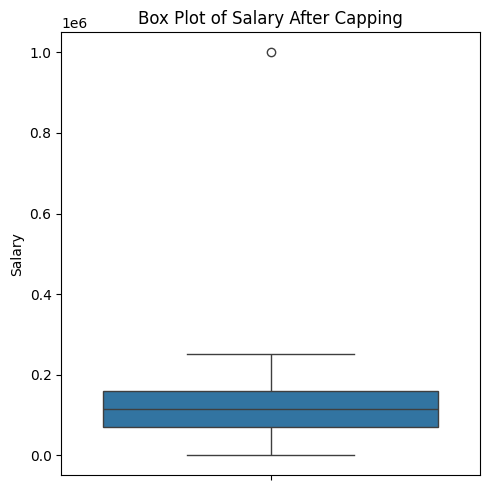

In [19]:
upper_limit = 20000000
df['Salary'] = df['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df['Salary'].describe())

plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

Hasil Uji Shapiro-Wilk: statistik = nan, p-value = nan
Data tidak berdistribusi normal (menolak H0)


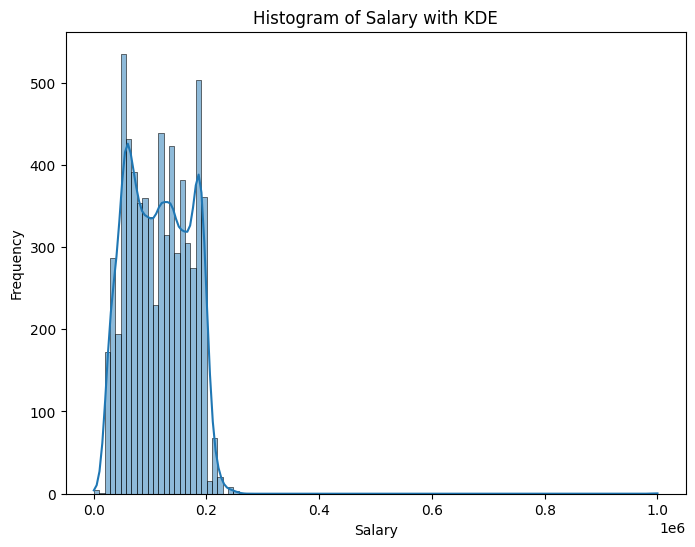

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Salary'])
print(f"Hasil Uji Shapiro-Wilk: statistik = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
    print("Data tidak berdistribusi normal (menolak H0)")

plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Histogram of Salary with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()